# Weighted Interval Scheduling on Medical Appointment Dataset

In [9]:
# Import files and libraries
import sys
from pathlib import Path
import os
sys.path.append(str(Path.cwd().parent))
import pandas as pd
import python.weighed_interval_scheduling as wis
import python.data_processing as process
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter, MultipleLocator
from datetime import date



days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
medical_path = "../data/processed-datasets/medical-appointment-scheduling-system/medical-appointments-"
cloud_path = "../data/processed-datasets/cloud-workload-job-traces/cloud-workload-"

In [10]:
# Import medical data
dfs = {}
for day in days:
    filepath = medical_path + day + ".csv"
    if Path(filepath).exists():
        df = pd.read_csv(filepath)
        dfs[day] = df

In [11]:
# Data frame columns
interval_col = 'appointment_id'
start_time_col = 'start_time'
end_time_col = 'end_time'
start_min_col = 'start_minutes'
end_min_col = 'end_minutes'
priority_col = 'priority'

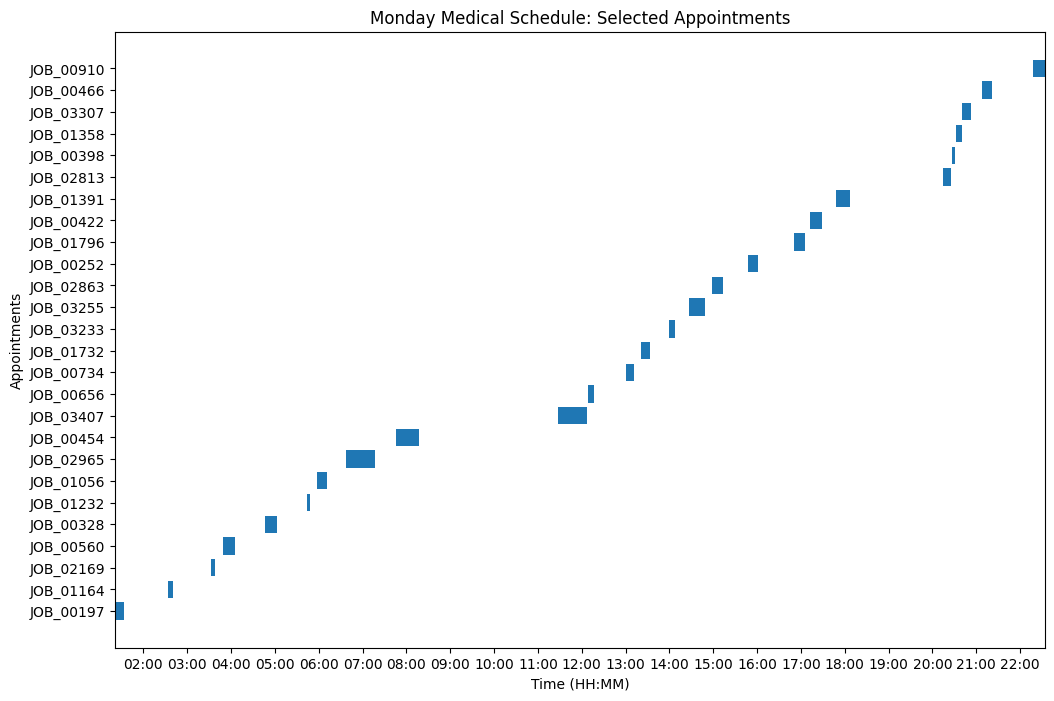

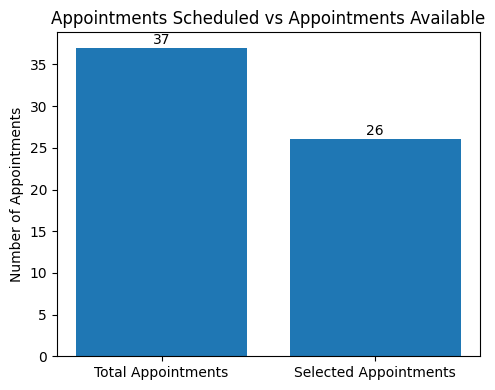

Monday Schedule:
Maximum Profit: 53
Selected Jobs: ['JOB_00197', 'JOB_01164', 'JOB_02169', 'JOB_00560', 'JOB_00328', 'JOB_01232', 'JOB_01056', 'JOB_02965', 'JOB_00454', 'JOB_03407', 'JOB_00656', 'JOB_00734', 'JOB_01732', 'JOB_03233', 'JOB_03255', 'JOB_02863', 'JOB_00252', 'JOB_01796', 'JOB_00422', 'JOB_01391', 'JOB_02813', 'JOB_00398', 'JOB_01358', 'JOB_03307', 'JOB_00466', 'JOB_00910']
Number of jobs selected: 26
Number of jobs not selected: 11
Runtime: 0.07837499993001984 milliseconds



<Figure size 640x480 with 0 Axes>

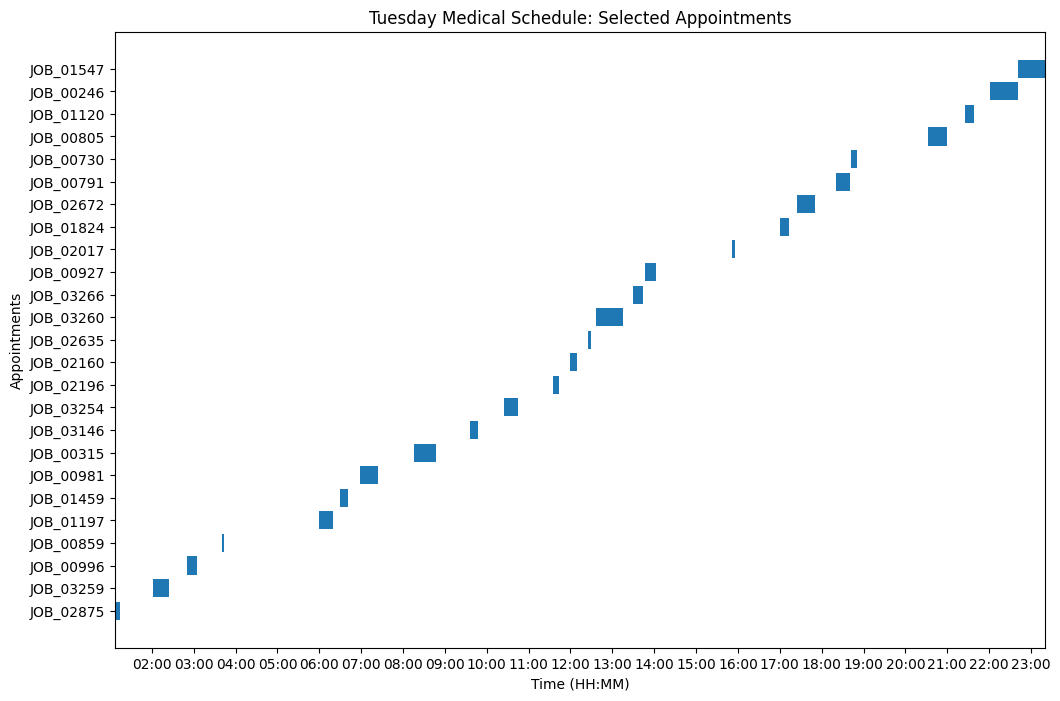

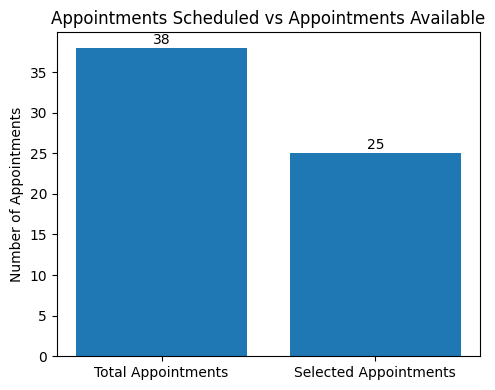

Tuesday Schedule:
Maximum Profit: 53
Selected Jobs: ['JOB_02875', 'JOB_03259', 'JOB_00996', 'JOB_00859', 'JOB_01197', 'JOB_01459', 'JOB_00981', 'JOB_00315', 'JOB_03146', 'JOB_03254', 'JOB_02196', 'JOB_02160', 'JOB_02635', 'JOB_03260', 'JOB_03266', 'JOB_00927', 'JOB_02017', 'JOB_01824', 'JOB_02672', 'JOB_00791', 'JOB_00730', 'JOB_00805', 'JOB_01120', 'JOB_00246', 'JOB_01547']
Number of jobs selected: 25
Number of jobs not selected: 13
Runtime: 0.04612500015355181 milliseconds



<Figure size 640x480 with 0 Axes>

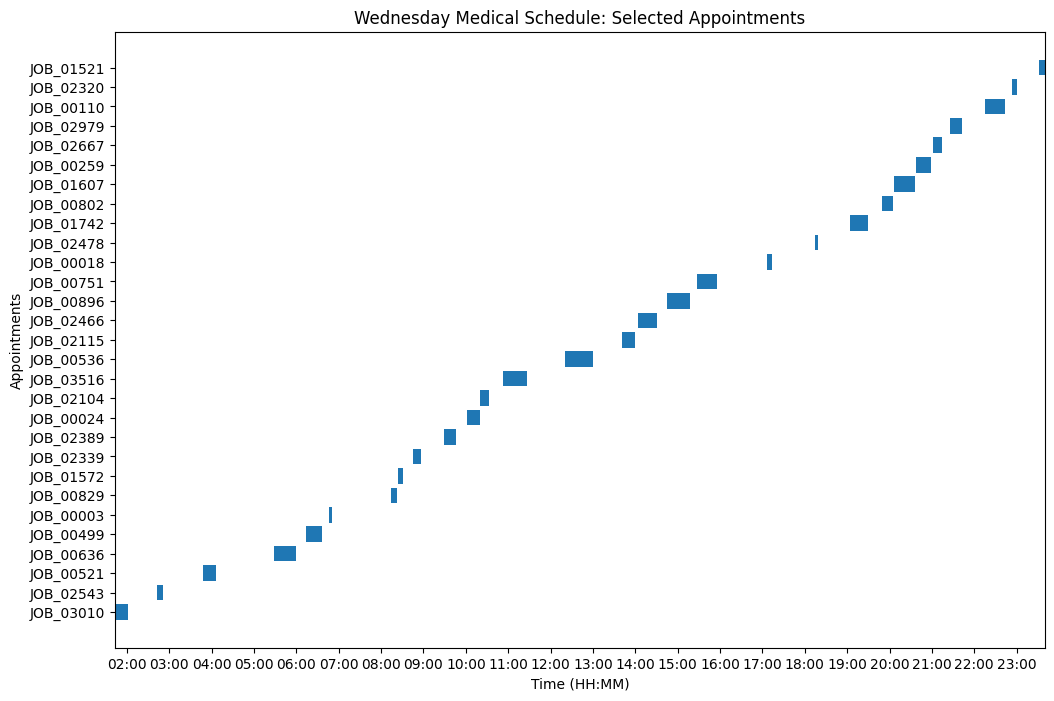

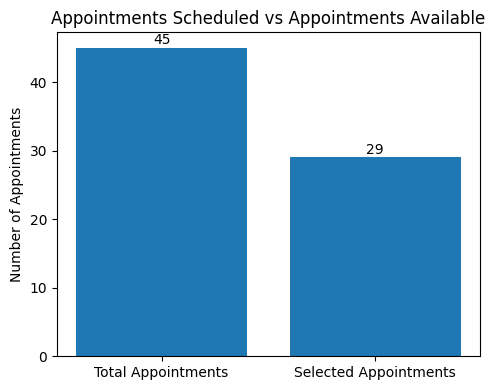

Wednesday Schedule:
Maximum Profit: 64
Selected Jobs: ['JOB_03010', 'JOB_02543', 'JOB_00521', 'JOB_00636', 'JOB_00499', 'JOB_00003', 'JOB_00829', 'JOB_01572', 'JOB_02339', 'JOB_02389', 'JOB_00024', 'JOB_02104', 'JOB_03516', 'JOB_00536', 'JOB_02115', 'JOB_02466', 'JOB_00896', 'JOB_00751', 'JOB_00018', 'JOB_02478', 'JOB_01742', 'JOB_00802', 'JOB_01607', 'JOB_00259', 'JOB_02667', 'JOB_02979', 'JOB_00110', 'JOB_02320', 'JOB_01521']
Number of jobs selected: 29
Number of jobs not selected: 16
Runtime: 0.05162499996913539 milliseconds



<Figure size 640x480 with 0 Axes>

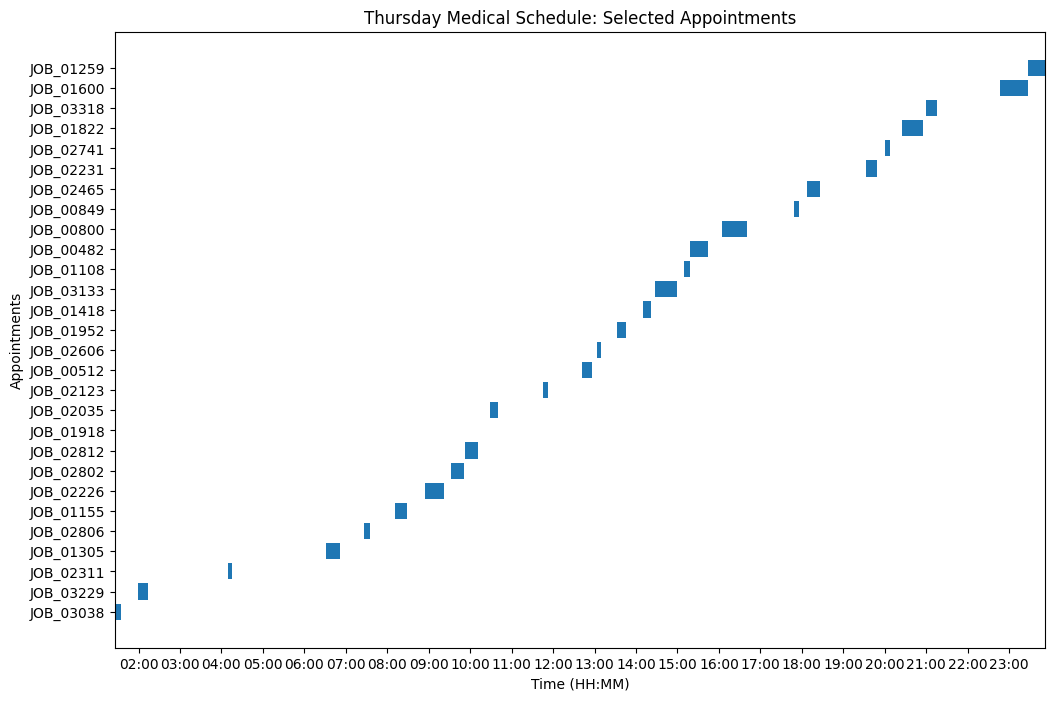

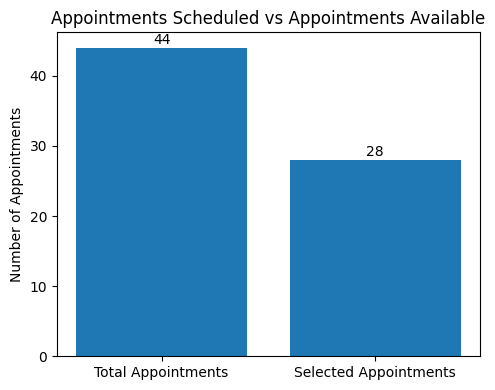

Thursday Schedule:
Maximum Profit: 55
Selected Jobs: ['JOB_03038', 'JOB_03229', 'JOB_02311', 'JOB_01305', 'JOB_02806', 'JOB_01155', 'JOB_02226', 'JOB_02802', 'JOB_02812', 'JOB_01918', 'JOB_02035', 'JOB_02123', 'JOB_00512', 'JOB_02606', 'JOB_01952', 'JOB_01418', 'JOB_03133', 'JOB_01108', 'JOB_00482', 'JOB_00800', 'JOB_00849', 'JOB_02465', 'JOB_02231', 'JOB_02741', 'JOB_01822', 'JOB_03318', 'JOB_01600', 'JOB_01259']
Number of jobs selected: 28
Number of jobs not selected: 16
Runtime: 0.05549999991671939 milliseconds



<Figure size 640x480 with 0 Axes>

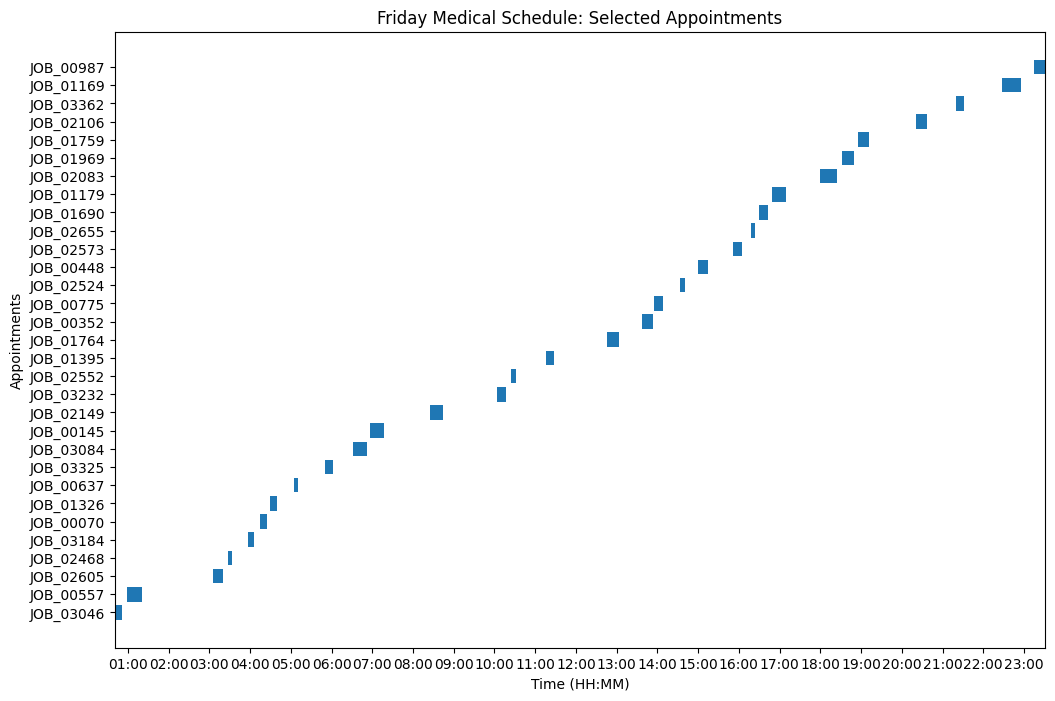

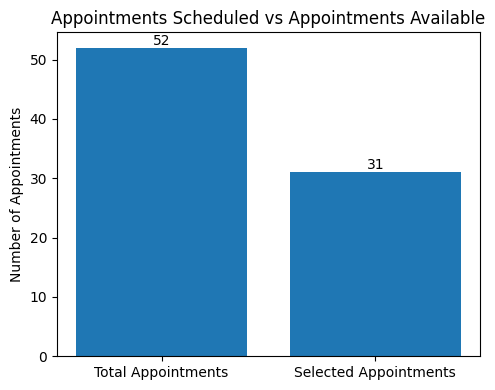

Friday Schedule:
Maximum Profit: 64
Selected Jobs: ['JOB_03046', 'JOB_00557', 'JOB_02605', 'JOB_02468', 'JOB_03184', 'JOB_00070', 'JOB_01326', 'JOB_00637', 'JOB_03325', 'JOB_03084', 'JOB_00145', 'JOB_02149', 'JOB_03232', 'JOB_02552', 'JOB_01395', 'JOB_01764', 'JOB_00352', 'JOB_00775', 'JOB_02524', 'JOB_00448', 'JOB_02573', 'JOB_02655', 'JOB_01690', 'JOB_01179', 'JOB_02083', 'JOB_01969', 'JOB_01759', 'JOB_02106', 'JOB_03362', 'JOB_01169', 'JOB_00987']
Number of jobs selected: 31
Number of jobs not selected: 21
Runtime: 0.06291599993346608 milliseconds



<Figure size 640x480 with 0 Axes>

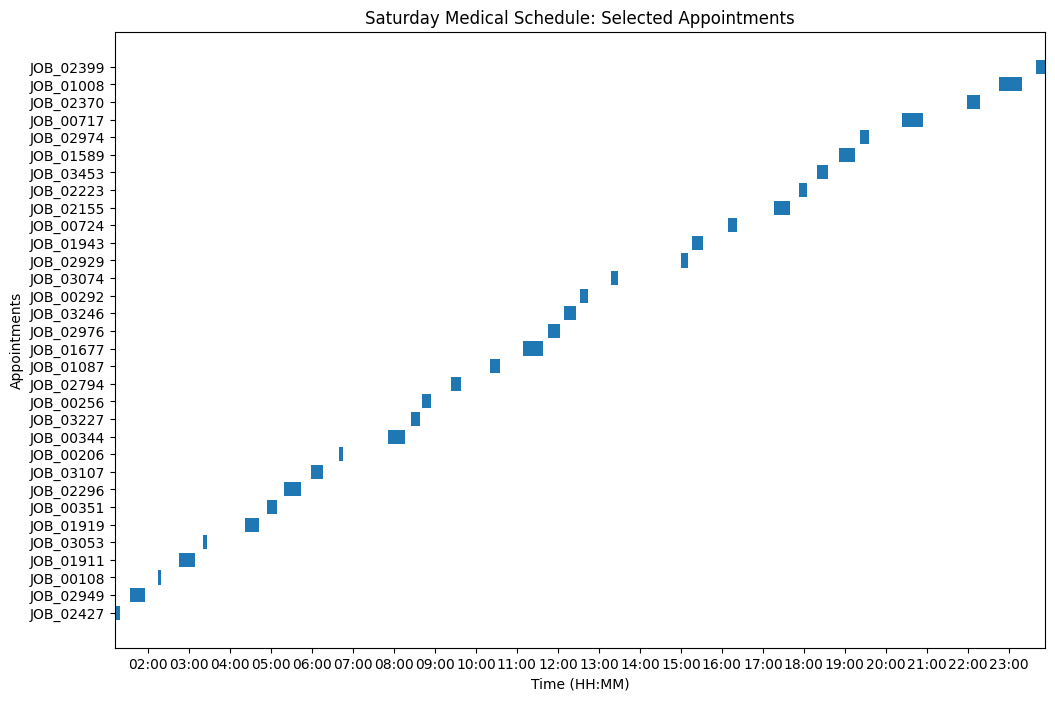

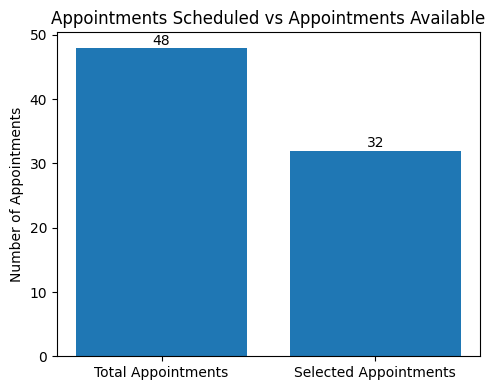

Saturday Schedule:
Maximum Profit: 66
Selected Jobs: ['JOB_02427', 'JOB_02949', 'JOB_00108', 'JOB_01911', 'JOB_03053', 'JOB_01919', 'JOB_00351', 'JOB_02296', 'JOB_03107', 'JOB_00206', 'JOB_00344', 'JOB_03227', 'JOB_00256', 'JOB_02794', 'JOB_01087', 'JOB_01677', 'JOB_02976', 'JOB_03246', 'JOB_00292', 'JOB_03074', 'JOB_02929', 'JOB_01943', 'JOB_00724', 'JOB_02155', 'JOB_02223', 'JOB_03453', 'JOB_01589', 'JOB_02974', 'JOB_00717', 'JOB_02370', 'JOB_01008', 'JOB_02399']
Number of jobs selected: 32
Number of jobs not selected: 16
Runtime: 0.05612499990093056 milliseconds



<Figure size 640x480 with 0 Axes>

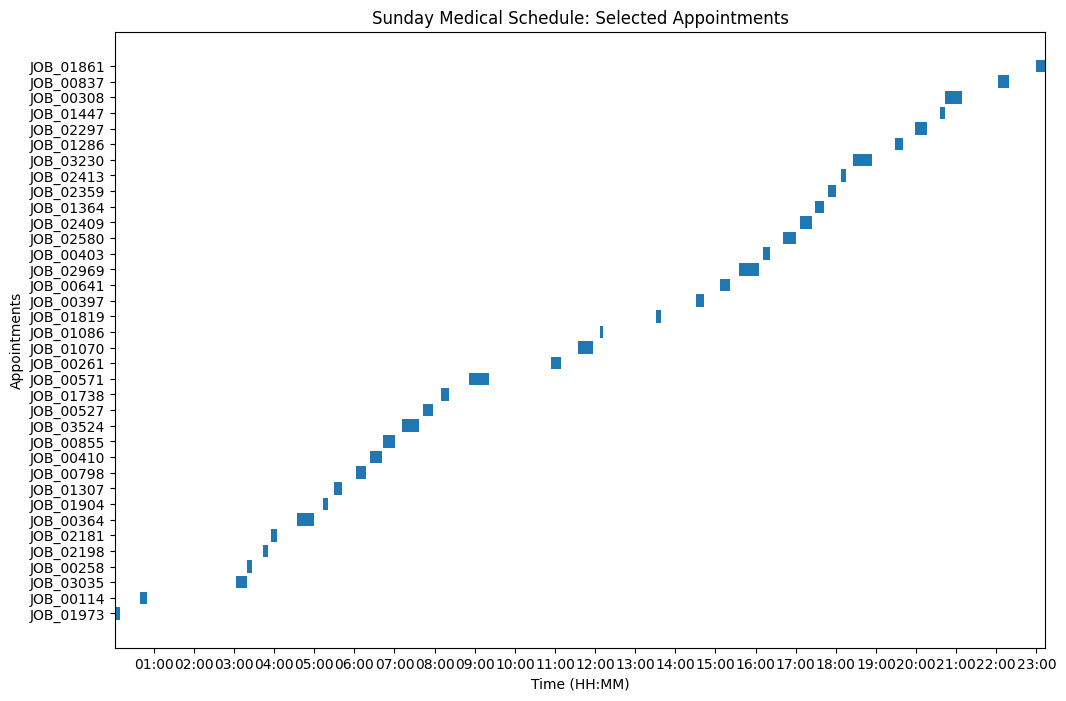

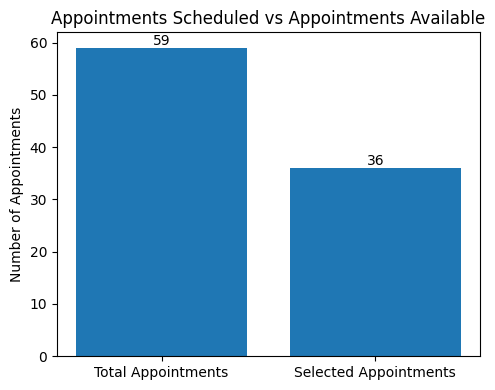

Sunday Schedule:
Maximum Profit: 82
Selected Jobs: ['JOB_01973', 'JOB_00114', 'JOB_03035', 'JOB_00258', 'JOB_02198', 'JOB_02181', 'JOB_00364', 'JOB_01904', 'JOB_01307', 'JOB_00798', 'JOB_00410', 'JOB_00855', 'JOB_03524', 'JOB_00527', 'JOB_01738', 'JOB_00571', 'JOB_00261', 'JOB_01070', 'JOB_01086', 'JOB_01819', 'JOB_00397', 'JOB_00641', 'JOB_02969', 'JOB_00403', 'JOB_02580', 'JOB_02409', 'JOB_01364', 'JOB_02359', 'JOB_02413', 'JOB_03230', 'JOB_01286', 'JOB_02297', 'JOB_01447', 'JOB_00308', 'JOB_00837', 'JOB_01861']
Number of jobs selected: 36
Number of jobs not selected: 23
Runtime: 0.0668750001295848 milliseconds

Total runtime for all schedules: 0.4175409999334079 milliseconds


<Figure size 640x480 with 0 Axes>

In [23]:
# Run wis algorithm on datasets, create gantt timeline charts
time_elapsed = []
for day, df in dfs.items():
    # Convert dataframes to lists
    interval = df[interval_col].to_list()
    intervalNum = [i for i in range(len(interval))]
    start_time = df[start_time_col].to_list()
    end_time = df[end_time_col].to_list()
    start = df[start_min_col].to_list()
    finish = df[end_min_col].to_list()
    weight = df[priority_col].to_list()
    
    df['Duration'] = df[end_min_col] - df[start_min_col]

    # Run algorithm
    start_timer = time.perf_counter()
    max_profit, selected_intervals = wis.create_interval_schedule(intervalNum, start, finish, weight)
    end_timer = time.perf_counter()
    runtime = (end_timer - start_timer) * 1000
    time_elapsed.append(runtime)

    selected_df = df.iloc[selected_intervals].copy()
    selected_df = selected_df.sort_values(start_min_col).reset_index(drop=True)
    # Duration in minutes
    selected_df["Duration"] = selected_df[end_min_col] - selected_df[start_min_col]   

    # Save job schedule to csv files
    path = "../results/medical-appointments/schedule"
    os.makedirs(path, exist_ok=True)
    filename = f"{path}/{day}-schedule.csv"
    selected_df.to_csv(filename, index=False)

    # Create Gantt Chart
    fig, ax = plt.subplots(figsize=(12,8))

    # Set labels
    ax.set_title(f"{day} Medical Schedule: Selected Appointments")
    ax.set_xlabel("Time (HH:MM)")
    ax.set_ylabel('Appointments')

    # Set y values on graph 
    y_pos = np.arange(len(selected_df))
    ax.barh(
        y=y_pos, 
        left=selected_df[start_min_col], 
        width=selected_df["Duration"]
    )
    ax.set_yticks(y_pos)
    ax.set_yticklabels(selected_df[interval_col])

    # Set x values on graph
    xmin = selected_df[start_min_col].min()
    xmax = selected_df[end_min_col].max()
    ax.set_xlim(xmin, xmax)

    # Set ticks every hour
    ax.xaxis.set_major_locator(MultipleLocator(60))
    ax.xaxis.set_major_formatter(FuncFormatter(process.min_to_hhmm))

    # Adjust layout
    plt.tight_layout

    plt.savefig(f"../results/medical-appointments/gantt-chart/{day}_gantt.png")

    # Create bar chart: Jobs selected vs jobs available
    total_jobs = len(df)
    selected_jobs = len(selected_df)
    labels = ["Total Appointments", "Selected Appointments"]
    values = [total_jobs, selected_jobs]

    fig, ax = plt.subplots(figsize=(5,4))
    ax.bar(labels,values)

    # Chart lables
    ax.set_ylabel("Number of Appointments")
    ax.set_title("Appointments Scheduled vs Appointments Available")
    for i, v in enumerate(values):
        ax.text(i, v + 0.5, str(v), ha="center", fontsize=10)

    plt.tight_layout()
    plt.show()
    plt.savefig(f"../results/medical-appointments/bar-chart/{day}_bar.png")

    # Record results
    selected = [interval[i] for i in selected_intervals]
    print(f"{day} Schedule:")
    print(f"Maximum Profit: {max_profit}")
    print(f"Selected Jobs: {selected}")
    print(f"Number of jobs selected: {len(selected)}")
    print(f"Number of jobs not selected: {len(df) - len(selected)}")
    print(f"Runtime: {runtime} milliseconds\n")

print(f"Total runtime for all schedules: {sum(time_elapsed)} milliseconds")


# Weighted Interval Scheduling on Cloud Workload Datasset

In [14]:
# Import cloud data
dfs = {}
for day in days:
    filepath = cloud_path + day + ".csv"
    if Path(filepath).exists():
        df = pd.read_csv(filepath)
        dfs[day] = df

In [15]:
# Data frame columns
interval_col = 'job_interval'
start_time_col = 'start_time'
end_time_col = 'end_time'
start_min_col = 'start_minutes'
end_min_col = 'end_minutes'
priority_col = 'priority'

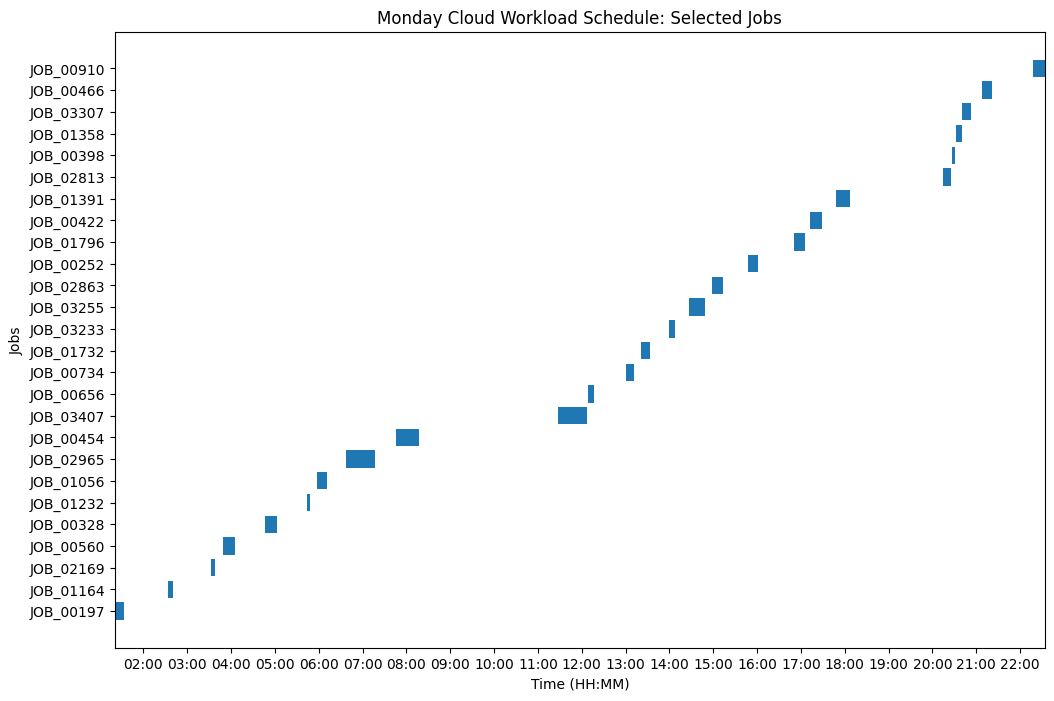

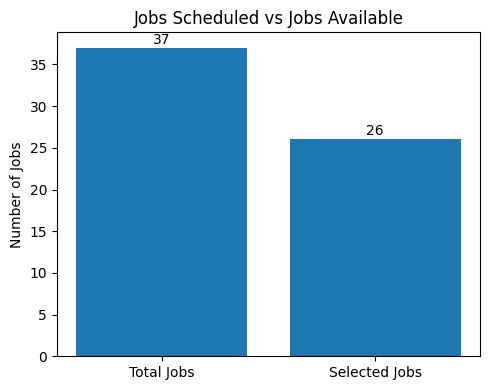

Monday Schedule:
Maximum Profit: 53
Selected Jobs: ['JOB_00197', 'JOB_01164', 'JOB_02169', 'JOB_00560', 'JOB_00328', 'JOB_01232', 'JOB_01056', 'JOB_02965', 'JOB_00454', 'JOB_03407', 'JOB_00656', 'JOB_00734', 'JOB_01732', 'JOB_03233', 'JOB_03255', 'JOB_02863', 'JOB_00252', 'JOB_01796', 'JOB_00422', 'JOB_01391', 'JOB_02813', 'JOB_00398', 'JOB_01358', 'JOB_03307', 'JOB_00466', 'JOB_00910']
Number of jobs selected: 26
Number of jobs not selected: 11
Runtime: 0.09183299994219851 milliseconds



<Figure size 640x480 with 0 Axes>

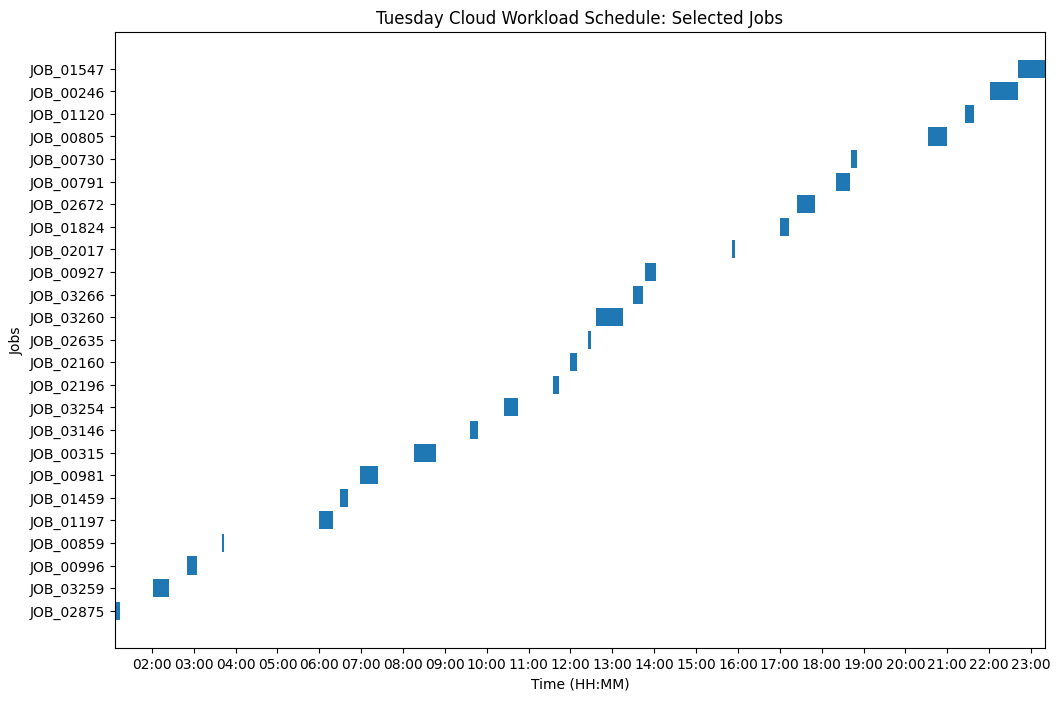

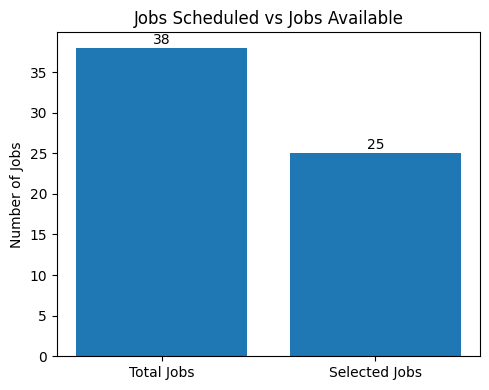

Tuesday Schedule:
Maximum Profit: 53
Selected Jobs: ['JOB_02875', 'JOB_03259', 'JOB_00996', 'JOB_00859', 'JOB_01197', 'JOB_01459', 'JOB_00981', 'JOB_00315', 'JOB_03146', 'JOB_03254', 'JOB_02196', 'JOB_02160', 'JOB_02635', 'JOB_03260', 'JOB_03266', 'JOB_00927', 'JOB_02017', 'JOB_01824', 'JOB_02672', 'JOB_00791', 'JOB_00730', 'JOB_00805', 'JOB_01120', 'JOB_00246', 'JOB_01547']
Number of jobs selected: 25
Number of jobs not selected: 13
Runtime: 0.04670799989980878 milliseconds



<Figure size 640x480 with 0 Axes>

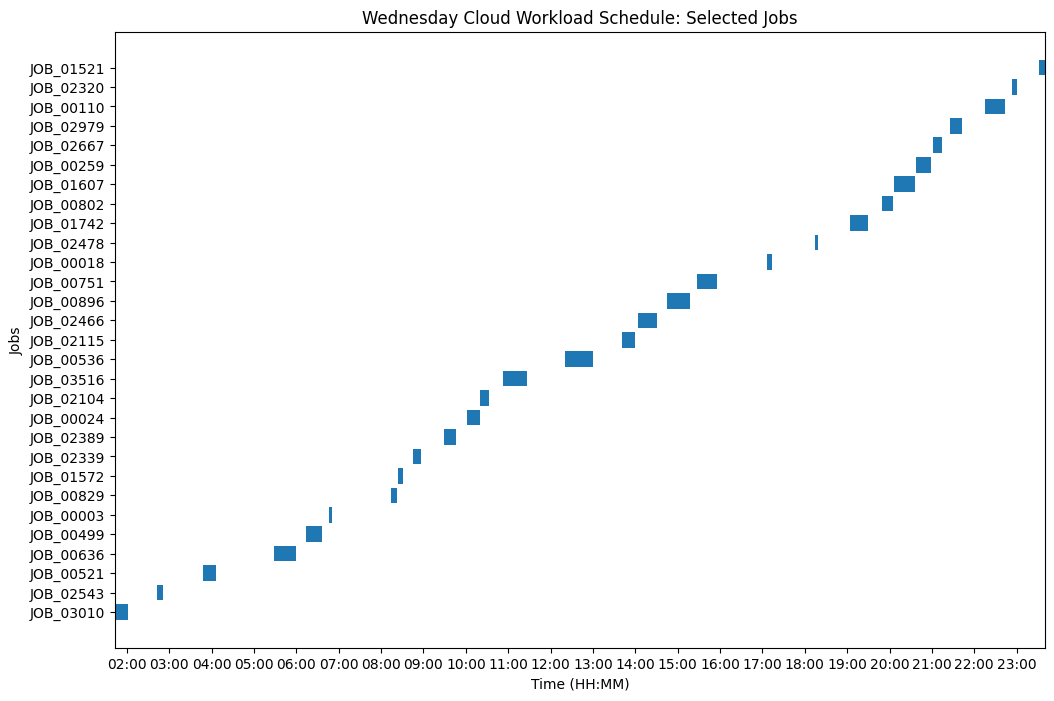

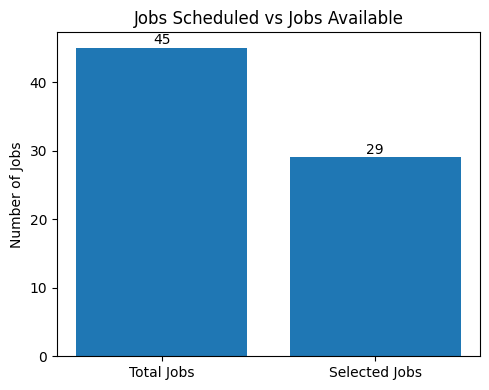

Wednesday Schedule:
Maximum Profit: 64
Selected Jobs: ['JOB_03010', 'JOB_02543', 'JOB_00521', 'JOB_00636', 'JOB_00499', 'JOB_00003', 'JOB_00829', 'JOB_01572', 'JOB_02339', 'JOB_02389', 'JOB_00024', 'JOB_02104', 'JOB_03516', 'JOB_00536', 'JOB_02115', 'JOB_02466', 'JOB_00896', 'JOB_00751', 'JOB_00018', 'JOB_02478', 'JOB_01742', 'JOB_00802', 'JOB_01607', 'JOB_00259', 'JOB_02667', 'JOB_02979', 'JOB_00110', 'JOB_02320', 'JOB_01521']
Number of jobs selected: 29
Number of jobs not selected: 16
Runtime: 0.05262499985292379 milliseconds



<Figure size 640x480 with 0 Axes>

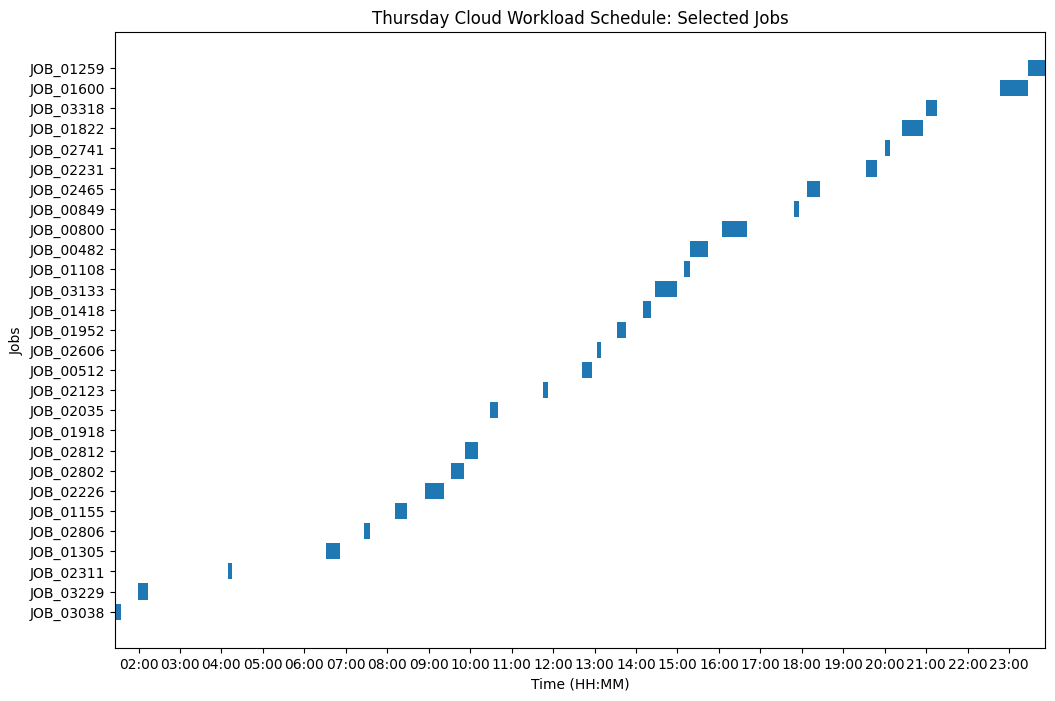

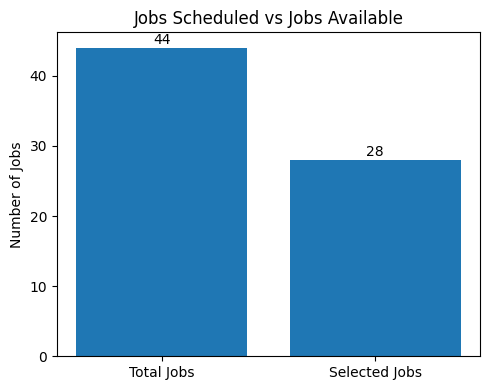

Thursday Schedule:
Maximum Profit: 55
Selected Jobs: ['JOB_03038', 'JOB_03229', 'JOB_02311', 'JOB_01305', 'JOB_02806', 'JOB_01155', 'JOB_02226', 'JOB_02802', 'JOB_02812', 'JOB_01918', 'JOB_02035', 'JOB_02123', 'JOB_00512', 'JOB_02606', 'JOB_01952', 'JOB_01418', 'JOB_03133', 'JOB_01108', 'JOB_00482', 'JOB_00800', 'JOB_00849', 'JOB_02465', 'JOB_02231', 'JOB_02741', 'JOB_01822', 'JOB_03318', 'JOB_01600', 'JOB_01259']
Number of jobs selected: 28
Number of jobs not selected: 16
Runtime: 0.10733399994933279 milliseconds



<Figure size 640x480 with 0 Axes>

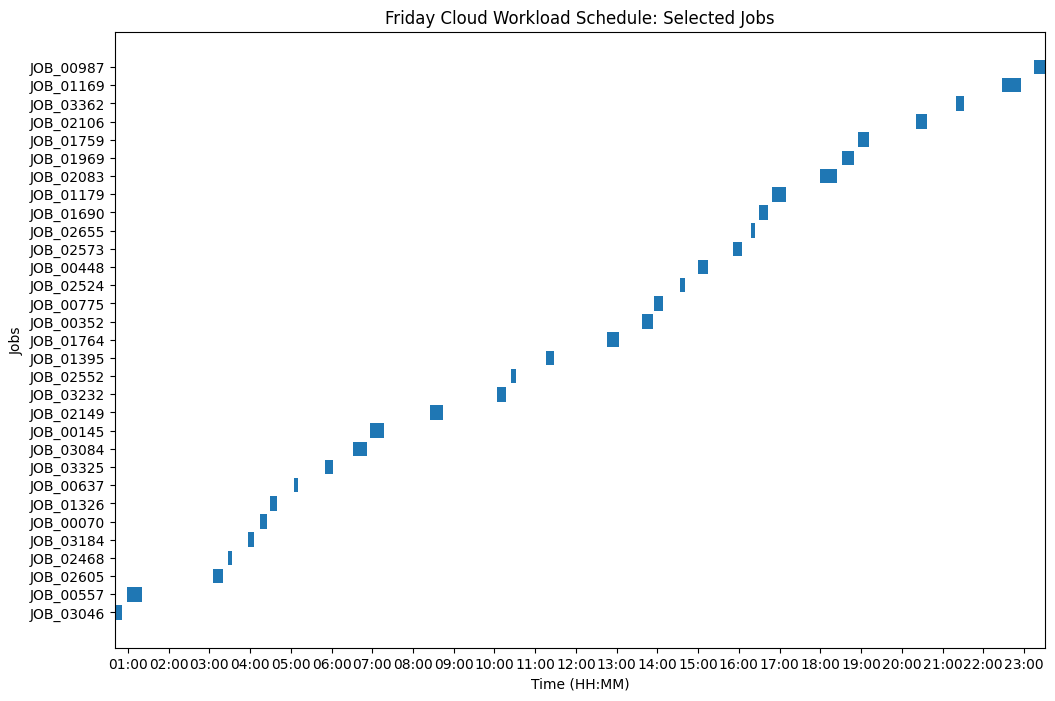

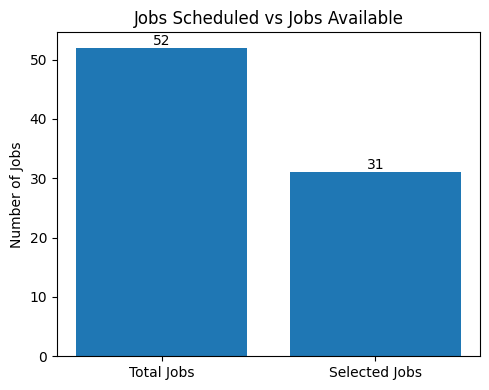

Friday Schedule:
Maximum Profit: 64
Selected Jobs: ['JOB_03046', 'JOB_00557', 'JOB_02605', 'JOB_02468', 'JOB_03184', 'JOB_00070', 'JOB_01326', 'JOB_00637', 'JOB_03325', 'JOB_03084', 'JOB_00145', 'JOB_02149', 'JOB_03232', 'JOB_02552', 'JOB_01395', 'JOB_01764', 'JOB_00352', 'JOB_00775', 'JOB_02524', 'JOB_00448', 'JOB_02573', 'JOB_02655', 'JOB_01690', 'JOB_01179', 'JOB_02083', 'JOB_01969', 'JOB_01759', 'JOB_02106', 'JOB_03362', 'JOB_01169', 'JOB_00987']
Number of jobs selected: 31
Number of jobs not selected: 21
Runtime: 0.12041700006193423 milliseconds



<Figure size 640x480 with 0 Axes>

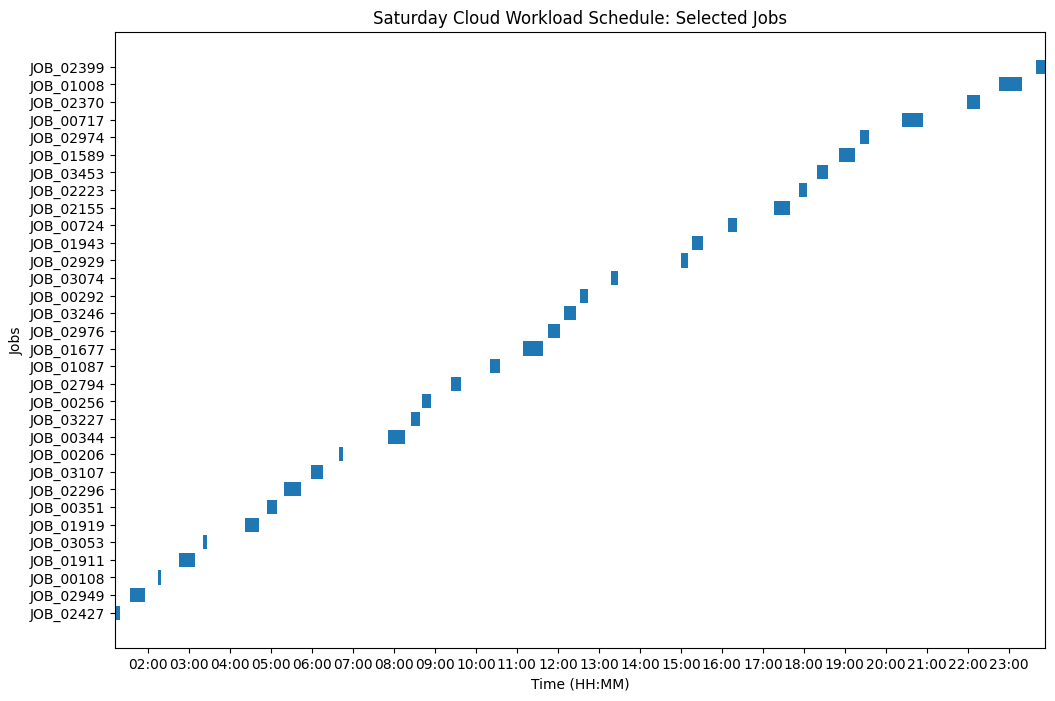

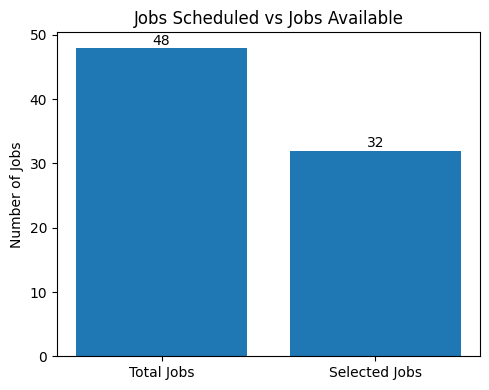

Saturday Schedule:
Maximum Profit: 66
Selected Jobs: ['JOB_02427', 'JOB_02949', 'JOB_00108', 'JOB_01911', 'JOB_03053', 'JOB_01919', 'JOB_00351', 'JOB_02296', 'JOB_03107', 'JOB_00206', 'JOB_00344', 'JOB_03227', 'JOB_00256', 'JOB_02794', 'JOB_01087', 'JOB_01677', 'JOB_02976', 'JOB_03246', 'JOB_00292', 'JOB_03074', 'JOB_02929', 'JOB_01943', 'JOB_00724', 'JOB_02155', 'JOB_02223', 'JOB_03453', 'JOB_01589', 'JOB_02974', 'JOB_00717', 'JOB_02370', 'JOB_01008', 'JOB_02399']
Number of jobs selected: 32
Number of jobs not selected: 16
Runtime: 0.06620799990741943 milliseconds



<Figure size 640x480 with 0 Axes>

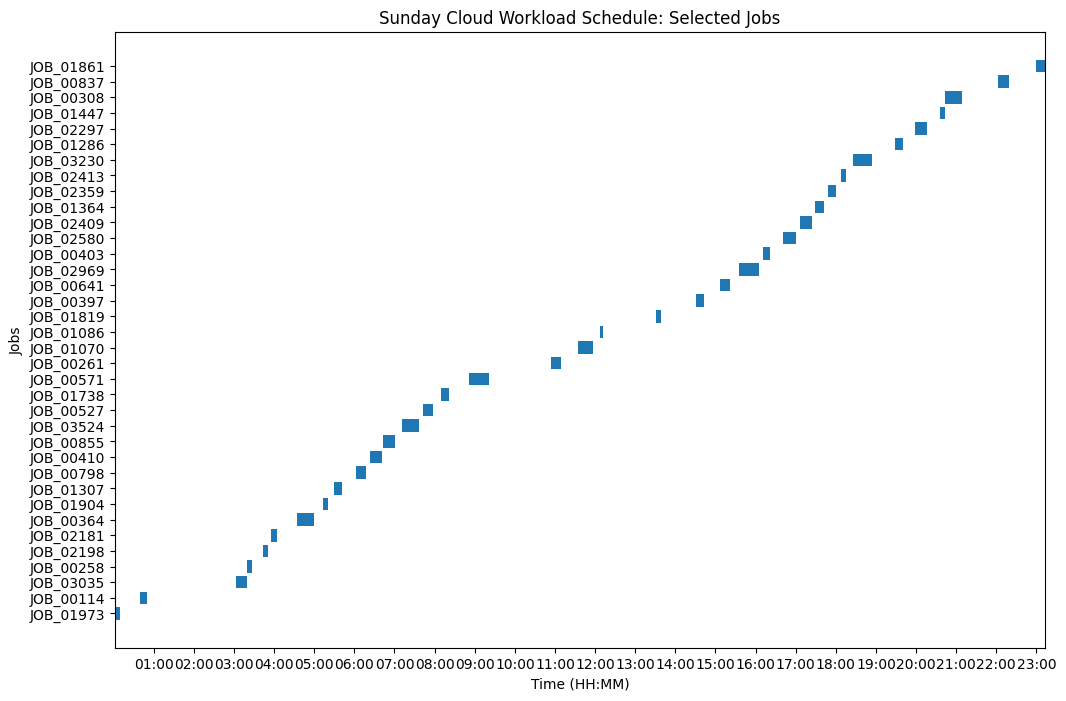

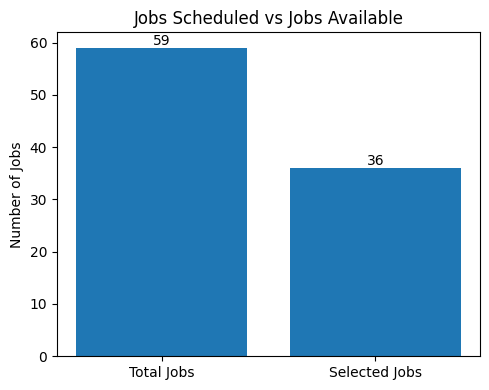

Sunday Schedule:
Maximum Profit: 82
Selected Jobs: ['JOB_01973', 'JOB_00114', 'JOB_03035', 'JOB_00258', 'JOB_02198', 'JOB_02181', 'JOB_00364', 'JOB_01904', 'JOB_01307', 'JOB_00798', 'JOB_00410', 'JOB_00855', 'JOB_03524', 'JOB_00527', 'JOB_01738', 'JOB_00571', 'JOB_00261', 'JOB_01070', 'JOB_01086', 'JOB_01819', 'JOB_00397', 'JOB_00641', 'JOB_02969', 'JOB_00403', 'JOB_02580', 'JOB_02409', 'JOB_01364', 'JOB_02359', 'JOB_02413', 'JOB_03230', 'JOB_01286', 'JOB_02297', 'JOB_01447', 'JOB_00308', 'JOB_00837', 'JOB_01861']
Number of jobs selected: 36
Number of jobs not selected: 23
Runtime: 0.06574999997610576 milliseconds

Total runtime for all schedules: 0.5508749995897233 milliseconds


<Figure size 640x480 with 0 Axes>

In [24]:
# Run wis algorithm on datasets, create gantt timeline charts
time_elapsed = []
for day, df in dfs.items():
    # Convert dataframes to lists
    interval = df[interval_col].to_list()
    intervalNum = [i for i in range(len(interval))]
    start_time = df[start_time_col].to_list()
    end_time = df[end_time_col].to_list()
    start = df[start_min_col].to_list()
    finish = df[end_min_col].to_list()
    weight = df[priority_col].to_list()
    
    df['Duration'] = df[end_min_col] - df[start_min_col]

    # Run algorithm
    start_timer = time.perf_counter()
    max_profit, selected_intervals = wis.create_interval_schedule(intervalNum, start, finish, weight)
    end_timer = time.perf_counter()
    runtime = (end_timer - start_timer) * 1000
    time_elapsed.append(runtime)

    selected_df = df.iloc[selected_intervals].copy()
    selected_df = selected_df.sort_values(start_min_col).reset_index(drop=True)
    # Duration in minutes
    selected_df["Duration"] = selected_df[end_min_col] - selected_df[start_min_col]   

    # Save job schedule to csv files
    path = "../results/cloud-workload/schedule"
    os.makedirs(path, exist_ok=True)
    filename = f"{path}/{day}-schedule.csv"
    selected_df.to_csv(filename, index=False)

    # Duration in minutes
    selected_df["Duration"] = selected_df[end_min_col] - selected_df[start_min_col]    

    # Create Gantt Chart
    fig, ax = plt.subplots(figsize=(12,8))

    # Set labels
    ax.set_title(f"{day} Cloud Workload Schedule: Selected Jobs")
    ax.set_xlabel("Time (HH:MM)")
    ax.set_ylabel('Jobs')

    # Set y values on graph 
    y_pos = np.arange(len(selected_df))
    ax.barh(
        y=y_pos, 
        left=selected_df[start_min_col], 
        width=selected_df["Duration"]
    )
    ax.set_yticks(y_pos)
    ax.set_yticklabels(selected_df[interval_col])

    # Set x values on graph
    xmin = selected_df[start_min_col].min()
    xmax = selected_df[end_min_col].max()
    ax.set_xlim(xmin, xmax)

    # Set ticks every hour
    ax.xaxis.set_major_locator(MultipleLocator(60))
    ax.xaxis.set_major_formatter(FuncFormatter(process.min_to_hhmm))

    # Adjust layout
    plt.tight_layout

    plt.savefig(f"../results/cloud-workload/gantt-chart/{day}_gantt.png")

    # Create bar chart: Jobs selected vs jobs available
    total_jobs = len(df)
    selected_jobs = len(selected_df)
    labels = ["Total Jobs", "Selected Jobs"]
    values = [total_jobs, selected_jobs]

    fig, ax = plt.subplots(figsize=(5,4))
    ax.bar(labels,values)

    # Chart lables
    ax.set_ylabel("Number of Jobs")
    ax.set_title("Jobs Scheduled vs Jobs Available")
    for i, v in enumerate(values):
        ax.text(i, v + 0.5, str(v), ha="center", fontsize=10)

    plt.tight_layout()
    plt.show()
    plt.savefig(f"../results/cloud-workload/bar-chart/{day}_bar.png")

    # Record results
    selected = [interval[i] for i in selected_intervals]
    print(f"{day} Schedule:")
    print(f"Maximum Profit: {max_profit}")
    print(f"Selected Jobs: {selected}")
    print(f"Number of jobs selected: {len(selected)}")
    print(f"Number of jobs not selected: {len(df) - len(selected)}")
    print(f"Runtime: {runtime} milliseconds\n")

print(f"Total runtime for all schedules: {sum(time_elapsed)} milliseconds")